# Project 6 Linear Regression
Jensen Judkins, Samuel McMillan

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Read in the data
df = pd.read_csv("RRCA_baseflow.csv")


Below sets the date according to the offset given in the assignment description. Adds columns for year, month, day, and date which is the full date in the format of year-month-day.

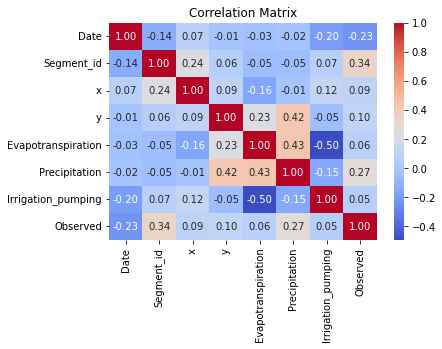

In [3]:
#Offsetting the days
#Date has some idiosyncrasies. Take make it easier to work with, subtract 693963 from the value. The new value is the number of days since Jan 1, 1900.
offset = 693963
df['days_since_1900'] = df['Date'] - offset

#add month, year, and day columns
pd.period_range("1215-01-01", "1381-01-01", freq="D")
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
#period
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
#display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)

df.head()
correlation_matrix = df[['Date', 'Segment_id', 'x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<AxesSubplot:xlabel='Irrigation_pumping', ylabel='Observed'>

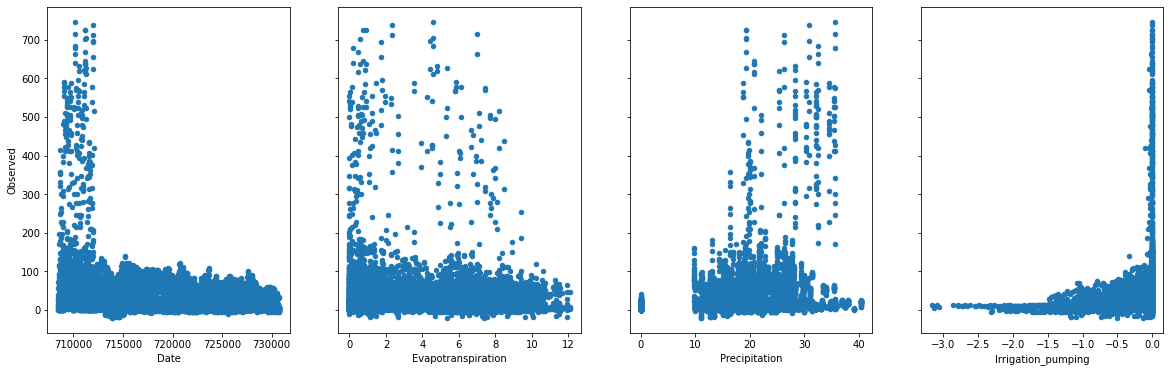

In [4]:
# Visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
df.plot(kind='scatter', x='Date', y='Observed', ax=axs[0])
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[2])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[3])

## Prepare Irrigation Pumping For Linear Regression

<AxesSubplot:xlabel='Irrigation_pumping', ylabel='Observed'>

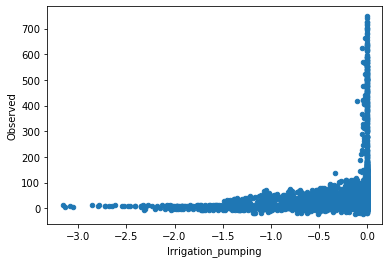

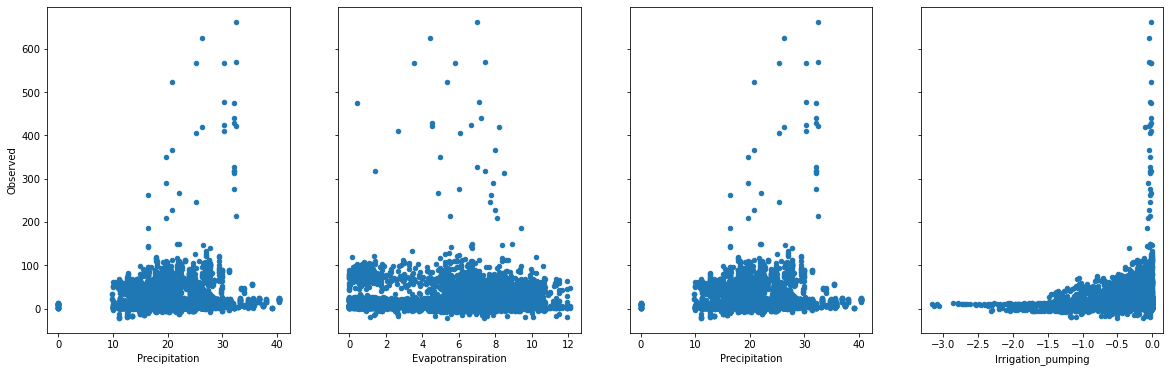

In [5]:
df = df[df["Irrigation_pumping"] <= 0]
# Visualize the relationship between the features and the response using scatterplots
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed')
df = df[df["Irrigation_pumping"] < 0]
# Visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[0])
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[2])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[3])

In [6]:
# create X and y
feature_cols = ['Irrigation_pumping']
X = df[feature_cols]
y = df.Observed

In [7]:
def cross_validate(X, Y, num_iter=10, columns=None):
    rSquaredValues = []
    if columns is None:
        columns = list(X.columns)
    for i in range(num_iter):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        r_squared_test = lm.score(X_test, y_test)
        print("R-squared on test set: ", r_squared_test, "For ", columns)
#         X_new = pd.DataFrame({'Irrigation_pumping': [df.Irrigation_pumping.min(), df.Irrigation_pumping.max()]})
#         # first, plot the observed data
#         df.plot(kind='scatter', x=columns[0], y='Observed')
#         preds = lm.predict(X_new)
#         # then, plot the least squares line
#         plt.plot(X_new, predictions, c='red', linewidth=2)
#         plt.show()

In [8]:
cross_validate(X,y,columns=["Irrigation_pumping"])
cross_validate(X,y,columns=["Evapotranspiration"])
cross_validate(X,y,columns=["Precipitation"])
cross_validate(X,y,columns=["Date"])

R-squared on test set:  0.007889117440503579 For  ['Irrigation_pumping']
R-squared on test set:  0.01622185510310803 For  ['Irrigation_pumping']
R-squared on test set:  0.011657952769601243 For  ['Irrigation_pumping']
R-squared on test set:  0.011046731798899367 For  ['Irrigation_pumping']
R-squared on test set:  0.0016039140254078266 For  ['Irrigation_pumping']
R-squared on test set:  0.013420146928739274 For  ['Irrigation_pumping']
R-squared on test set:  0.01357638186977328 For  ['Irrigation_pumping']
R-squared on test set:  0.01571091469397423 For  ['Irrigation_pumping']
R-squared on test set:  0.007483355143504955 For  ['Irrigation_pumping']
R-squared on test set:  0.012557418709996937 For  ['Irrigation_pumping']
R-squared on test set:  0.014374701457032901 For  ['Evapotranspiration']
R-squared on test set:  0.010880290453015085 For  ['Evapotranspiration']
R-squared on test set:  0.005099359520239322 For  ['Evapotranspiration']
R-squared on test set:  0.006652242312794265 For  ['E

In [9]:
df.Irrigation_pumping.max()

-0.00013057

In [ ]:
#create another column named "Baseflow" which is just a copy of "Observed"
df['Baseflow'] = df['Observed']

#Offsetting the days
#Date has some idiosyncrasies. Take make it easier to work with, subtract 693963 from the value. The new value is the number of days since Jan 1, 1900.
offset = 693963
df['days_since_1900'] = df['Date'] - offset

#add month, year, and day columns
pd.period_range("1215-01-01", "1381-01-01", freq="D")
period = pd.Period('1900-1-1', freq='D') - pd.Period('0001-2-1', freq='D')
#period
df['days_since_1900'] = df.Date - offset
df['date'] = pd.to_datetime(df.days_since_1900.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
#display(df.head(2))
df.loc[0,'date'].month
df['year'] = df.date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.date.apply(lambda x:pd.to_datetime(x).day)
df['week'] = df.date.apply(lambda x:pd.to_datetime(x).week)

df.head()


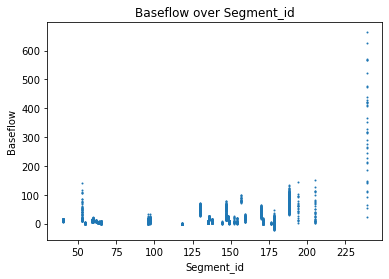

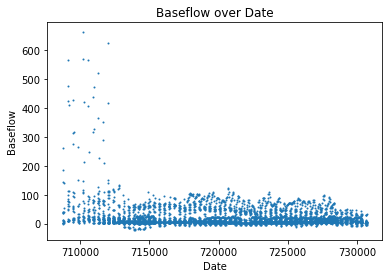

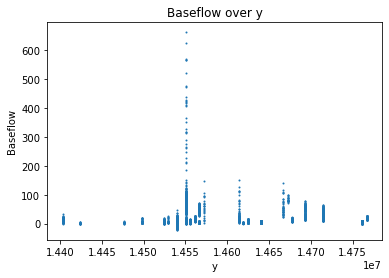

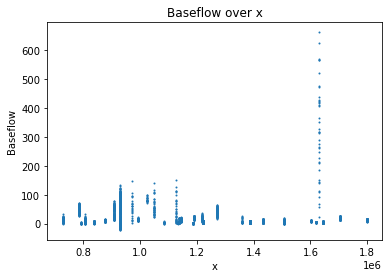

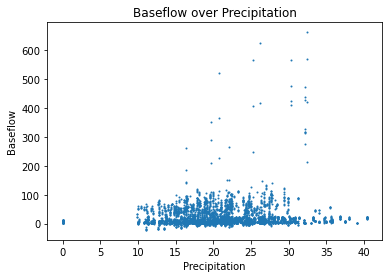

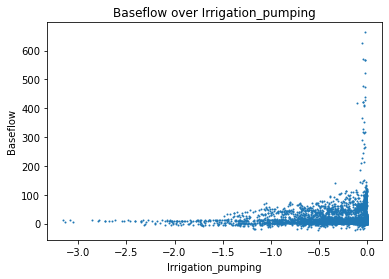

In [10]:

#Scatterplot of baseflow and Segment_id
plt.scatter(df['Segment_id'], df['Baseflow'], s=1)
plt.xlabel('Segment_id')
plt.ylabel('Baseflow')
plt.title('Baseflow over Segment_id')
plt.show()

#Scatterplot of baseflow and Date
plt.scatter(df['Date'], df['Baseflow'], s=1)
plt.xlabel('Date')
plt.ylabel('Baseflow')
plt.title('Baseflow over Date')
plt.show()

#Scatterplot of baseflow and y
plt.scatter(df['y'], df['Baseflow'], s=1)
plt.xlabel('y')
plt.ylabel('Baseflow')
plt.title('Baseflow over y')
plt.show()


#Scatterplot of baseflow and x
plt.scatter(df['x'], df['Baseflow'], s=1)
plt.xlabel('x')
plt.ylabel('Baseflow')
plt.title('Baseflow over x')
plt.show()

#Scatterplot of baseflow and Precipitation
plt.scatter(df['Precipitation'], df['Baseflow'], s=1)
plt.xlabel('Precipitation')
plt.ylabel('Baseflow')
plt.title('Baseflow over Precipitation')
plt.show()

#Scatterplot of baseflow and Irrigation_pumping
plt.scatter(df['Irrigation_pumping'], df['Baseflow'], s=1)
plt.xlabel('Irrigation_pumping')
plt.ylabel('Baseflow')
plt.title('Baseflow over Irrigation_pumping')
plt.show()




In [11]:
#make a new dataframe which filteres out y values if that y value ever contains a baseflow value below 0 or above 100
df_filtered = df[(df['Baseflow'] > 0) & (df['Baseflow'] < 100)]


In [12]:
#return the largest (with respect to baseflow) unique values of x in the data

df.groupby('x').Baseflow.max().sort_values(ascending=False).head(10)
#df.groupby('y').Baseflow.max().sort_values(ascending=False).head(10)


x
1630030    663.024590
1128430    150.172131
970030     146.104098
1049230    139.309020
927790     132.918033
1022830     99.774590
906670      77.257377
785230      70.304918
1270990     64.300820
1218190     34.907377
Name: Baseflow, dtype: float64

KeyError: 'week'

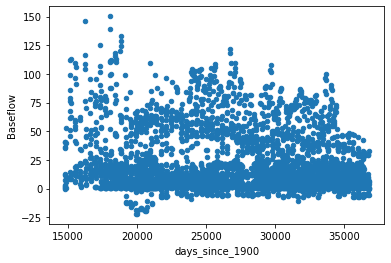

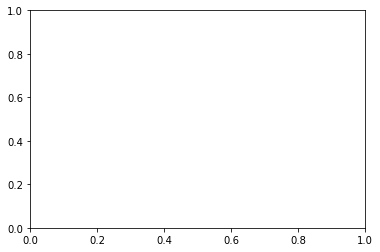

In [13]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Create a linear regression model
model = LinearRegression()

#Create a training dataset with only x values being NOT 1941550 or NOT 1630030

new_df_test = df[(df['x'] != 1941550) & (df['x'] != 1630030)]

#Multiple feature linear regression
new_df_test.plot.scatter( x='days_since_1900', y='Baseflow')
new_df_test.plot.scatter( x='week', y='Baseflow')
new_df_test.plot.scatter( x='month', y='Baseflow')
new_df_test.plot.scatter( x='year', y='Baseflow')
plt.show()

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Create a linear regression model
model = LinearRegression()

#Create a training dataset
#df['x'].isin([1941550, 1630030]) 
#new_df = df[(df['y'].isin([14524320,14550720]))]
#new_df = df[(df['x'].isin([1941550, 1630030]))]
#(df['x'] != 1941550) & (df['x'] != 1630030) & (df['y'] != 14524320) & (df['y'] != 14550720) &

#Make sure y doesnt contain any of these values
# 14524320    747.803280
# 14550720    712.557380
# 14614080    206.909836
# 14571840    204.830508
# 14666880    180.736890
# 14672160    112.504839

#Make sure x doesnt contain any of these values
# 1941550    747.803280
# 1630030    712.557380
# 1128430    206.909836
# 970030     204.830508
# 1049230    180.736890
# 927790     138.676230
# 1022830    112.504839


new_df = df[((df['Precipitation'] != 0) & (df['x'] != 1941550) & (df['x'] != 1630030) & (df['y'] != 14524320) & (df['y'] != 14550720) & (df['y'] != 14614080) & (df['y'] != 14571840) & (df['y'] != 14666880) & (df['y'] != 14672160) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030) & (df['x'] != 1049230) & (df['x'] != 927790) & (df['x'] != 1022830) & (df['x'] != 1128430) & (df['x'] != 970030))]


#Multiple feature linear regression
feature_cols = ['week','year', 'Segment_id', 'Evapotranspiration']
X = new_df[feature_cols]
y = new_df.Observed


#Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

#Print the coefficients
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2: ', model.score(X_test, y_test))

#Plot observed vs predicted and the line of best fit
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted')
plt.plot([0, 30], [0, 30], color='red')

#Add to the plot 95% confidence intervals
plt.plot([0, 30], [0, 30], color='red')
plt.plot([0, 30], [0, 30+1.96*np.sqrt(mse)], color='red', linestyle='dashed')
plt.plot([0, 30], [0, 30-1.96*np.sqrt(mse)], color='red', linestyle='dashed')
plt.show()

#Hypothesis testing with p-values
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


